In [4]:
import pandas as pd
data =[[1,2,1],
       [2,3,1],
       [3,3,1],
       [4,5,1],
       [5,5,1],
       [1,0,2],
       [2,1,2],
       [3,1,2],
       [3,2,2],
       [5,3,2],
       [6,5,2]]
df = pd.DataFrame(data,columns=['X','Y','target'])
print(df)

    X  Y  target
0   1  2       1
1   2  3       1
2   3  3       1
3   4  5       1
4   5  5       1
5   1  0       2
6   2  1       2
7   3  1       2
8   3  2       2
9   5  3       2
10  6  5       2


In [5]:
df_X=df[['X','Y']]
X=df_X.to_numpy()
X


array([[1, 2],
       [2, 3],
       [3, 3],
       [4, 5],
       [5, 5],
       [1, 0],
       [2, 1],
       [3, 1],
       [3, 2],
       [5, 3],
       [6, 5]], dtype=int64)

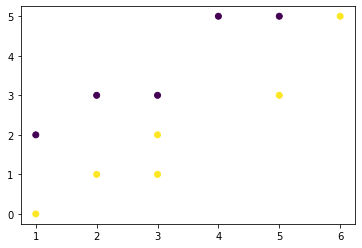

In [6]:
import matplotlib.pyplot as plt
plt.scatter(df.X,df.Y,c=df.target)
plt.show()

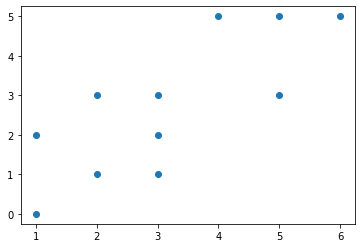

In [7]:
plt.scatter(X[:,0],X[:,1])


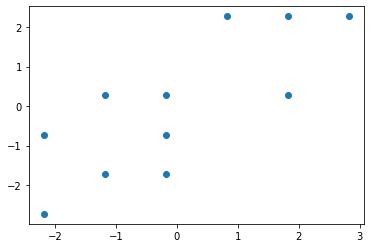

In [8]:
import numpy as np
def demean(X):
    # axis=0按列计算均值，即每个属性的均值，1则是计算行的均值
    return (X - np.mean(X, axis=0))

X_demean = demean(X)
# 注意看数据分布没变，但是坐标已经以原点为中心了
plt.scatter(X_demean[:, 0], X_demean[:, 1])
plt.show()

In [9]:
def f(w,X):
    return np.sum((X.dot(w)**2))/len(X)

In [10]:
def df_math(w,X):
    return X.T.dot(X.dot(w))*2./len(X)

In [11]:
# 验证梯度求解是否正确，使用梯度调试方法：
def df_debug(w, X, epsilon=0.0001):
    # 先创建一个与参数组等长的向量
    res = np.empty(len(w))
    # 对于每个梯度，求值
    for i in range(len(w)):
        w_1 = w.copy()
        w_1[i] += epsilon
        w_2 = w.copy()
        w_2[i] -= epsilon
        res[i] = (f(w_1, X) - f(w_2, X)) / (2 * epsilon)
    return res

In [12]:
def direction(w):
    return w / np.linalg.norm(w)

In [13]:
# 梯度上升法代码
def gradient_ascent(df, X, initial_w, eta, n_iters=1e4, epsilon=1e-8):
    w = direction(initial_w)
    cur_iter = 0
    while cur_iter < n_iters:
        gradient = df_math(w,X)
        last_w = w
        w = last_w + eta * gradient
        w = direction(w)    # 将w转换成单位向量
        if (abs(f(w,X) - f(last_w,X)) < epsilon):
            break
        cur_iter += 1
    return w

In [14]:
initial_w = np.random.random(X.shape[1])
eta = 0.001

In [15]:
w = gradient_ascent(df_debug, X_demean, initial_w, eta)
w

array([0.68661252, 0.72702355])

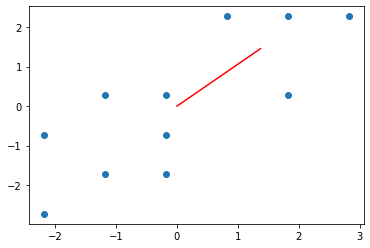

In [16]:
plt.scatter(X_demean[:,0],X_demean[:,1])
plt.plot([0,w[0]*2],[0,w[1]*2], color='red')
plt.show()

第4问

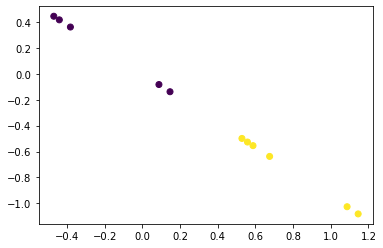

In [18]:
X_new = X - X.dot(w).reshape(-1,1) * w
plt.scatter(X_new[:,0], X_new[:,1],c=df.target)
plt.show()